In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math

# Task 1

$\theta_0(\lambda) = \lambda\cdot e^{-\lambda}$

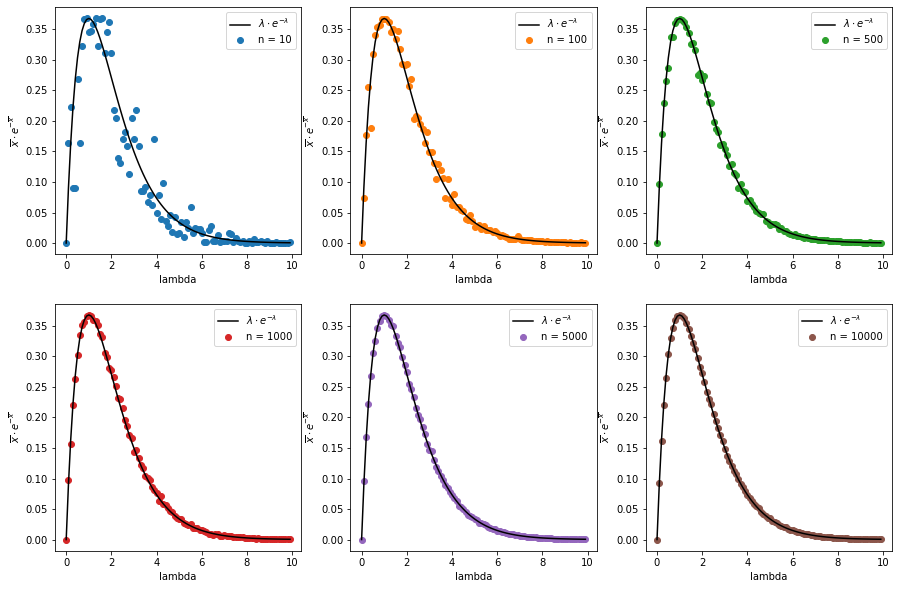

In [2]:
lams = np.arange(0, 10, 0.1)
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 10))

for k, i in enumerate([10, 100, 500, 1000, 5000, 10000]):
    tetas = []
    for lam in lams:
        xx = np.random.poisson(lam, i)
        teta_n = np.mean(xx) * np.exp(-np.mean(xx))
        tetas.append(teta_n)
    plt.subplot(2, 3, k+1)
    plt.scatter(lams, tetas, label="n = " + str(i), color=cmap[k])
    plt.xlabel("lambda")
    plt.ylabel("$\overline{x}\cdot e^{-\overline{x}}$")
    y = lams*np.exp(-lams)
    plt.plot(lams, y, c='k', label="$\lambda\cdot e^{-\lambda}$")
    plt.legend()
    
plt.show()

Оценка состоятельна. С ростом $n$ оценка сходится по вероятности к $\theta_0(\lambda) = \lambda\cdot e^{-\lambda}$

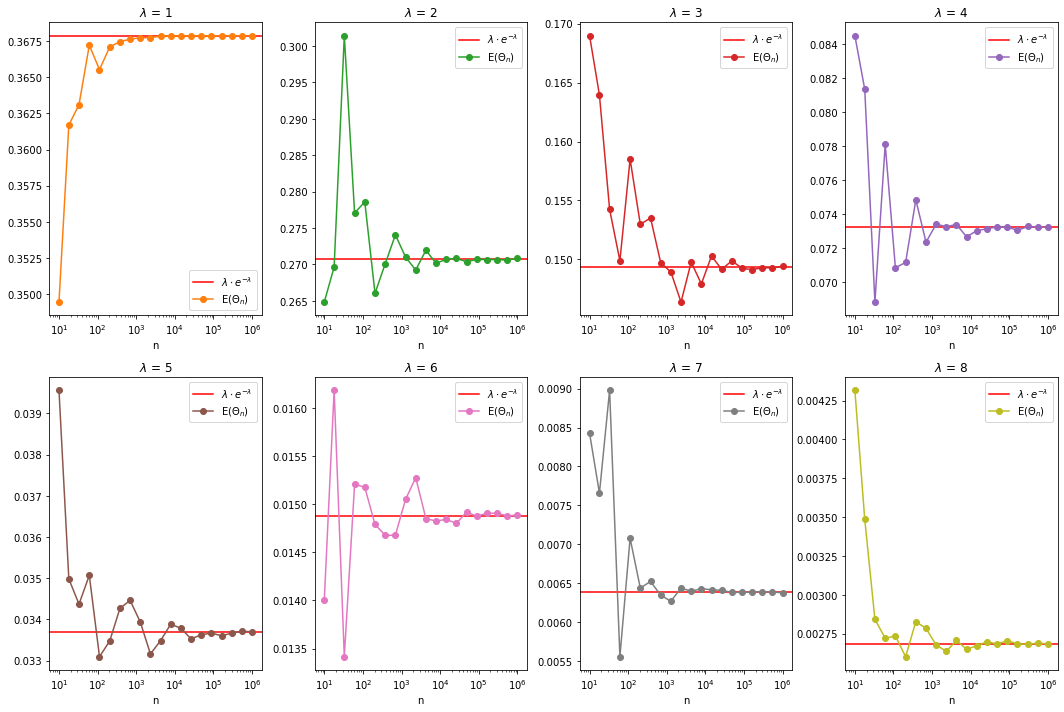

In [22]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
for lam in range(1, 9, 1):
    n = np.geomspace(10, 1000000, num=20, dtype=np.int64)
    yy = []
    for i in n:
        tetas = []
        for q in range(10):
            xx = np.random.poisson(lam, i)
            teta_n = np.mean(xx) * np.exp(-np.mean(xx))
            tetas.append(teta_n)
        yy.append(np.mean(tetas))
    plt.subplot(2, 4, lam)
    plt.tight_layout()
    plt.axhline(y=lam*np.exp(-lam), color='r', linestyle='-', label="$\lambda\cdot e^{-\lambda}$")
    plt.plot(n, yy, 'o-', label="E($\Theta_n$)", color=cmap[lam])
    plt.xscale('log')
    plt.xlabel("n")
    plt.title("$\lambda$ = " + str(lam))
    plt.legend()
plt.show()

Оценка асимптотически несмещена. При различных $\lambda$ матожидание оценки стремится к оцениваемой величине с ростом $n$

# Task 2

Доверительный интервал $\overline{X} - z_{\frac{1+\gamma}{2}}\sqrt{\frac{\overline{X}}{n}} < \lambda < \overline{X} + z_{\frac{1+\gamma}{2}}\sqrt{\frac{\overline{X}}{n}}$, где $z_{\frac{1+\gamma}{2}}$ -- квантиль стандартного нормального распределения

Для серии выборок покажем, что $\lambda$ попадает в доверительный интервал с нужной вероятностью

In [185]:
quant = dict(zip([0.9, 0.95, 0.99], [1.645, 1.96, 2.576])) # gamma -> z_(1+gamma)/2

for lam in range(1, 6, 1):
    for q in quant.keys():
        tetas = []
        n = 10000
        good = 0
        total = 10000
        for i in range(total):
            xx = np.random.poisson(lam, n)
            teta_n = np.mean(xx)
            low = teta_n - quant[q]*math.sqrt(teta_n*1./n)
            high = teta_n + quant[q]*math.sqrt(teta_n*1./n)
            if lam > low and lam < high:
                good += 1
        
        display(Math(f'\lambda = {lam}; \gamma = {q}; calculated~probability = {good/total}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

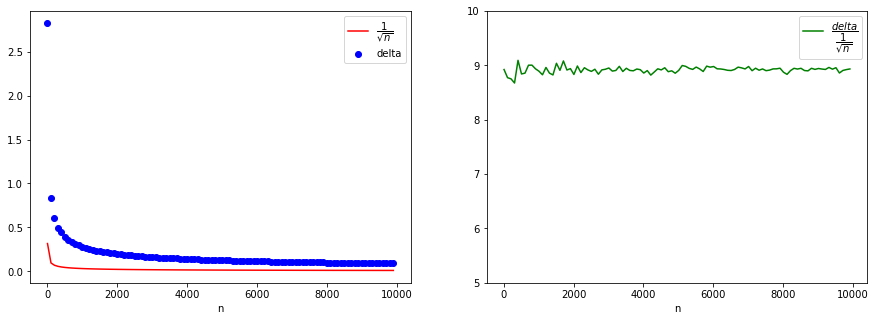

In [222]:
lam = 3
plt.figure(figsize=(15, 5))
ds = []
q=0.99
plt.subplot(1, 2, 1)
for n in range(10, 10000, 100):
    xx = np.random.poisson(lam, n)
    teta_n = np.mean(xx)
    low = teta_n - quant[q]*math.sqrt(teta_n*1./n)
    high = teta_n + quant[q]*math.sqrt(teta_n*1./n)
    delta = high - low
    ds.append(delta)
    if n == 10:
        plt.scatter(n, delta, c='b', label="delta")
    else:
        plt.scatter(n, delta, c='b')


n = np.arange(10, 10000, 100)
yy = [math.sqrt(1./i) for i in n]
plt.plot(n, yy, color='r', label='$\dfrac{1}{\sqrt{n}}$')
plt.xlabel("n")
plt.legend()

plt.subplot(1, 2, 2)
y = [j / math.sqrt(1./i) for i, j in zip(n, ds)]
plt.plot(x, y, color='g', label='$\dfrac{delta}{\dfrac{1}{\sqrt{n}}}$')
plt.xlabel("n")
plt.ylim(5, 10)

plt.legend()
plt.show()


Ширина доверительного интервала обратно пропорциональна корню из n. $delta \sim \dfrac{1}{\sqrt{n}}$

# Task 3

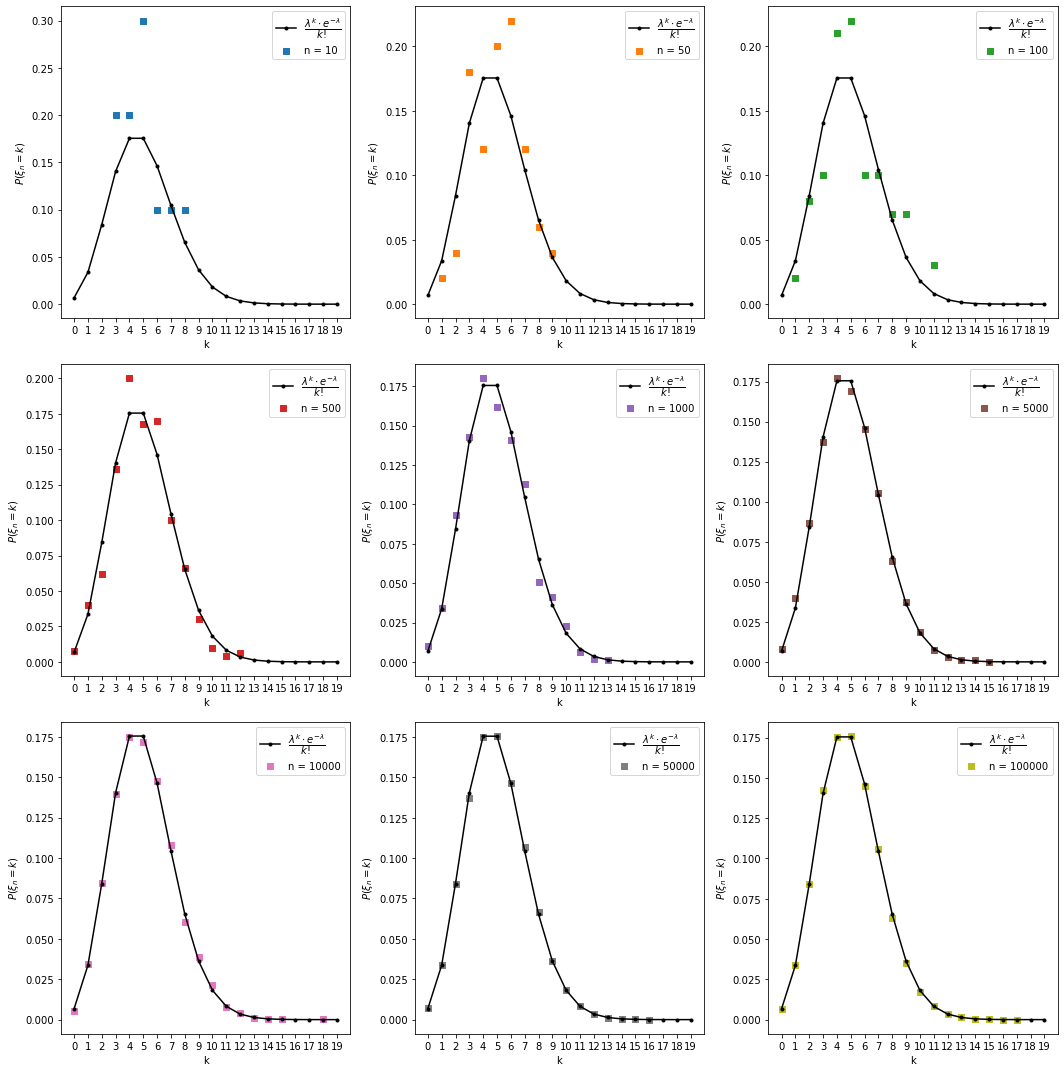

In [41]:
from collections import Counter

plt.figure(figsize=(15, 15))

x = range(0, 20)
    
for k, n in enumerate([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]):
    lam = 5
    p = lam / n
    c = Counter()

    for i in range(n):
        c[np.random.binomial(n, p)] += 1

    total = sum(c.values())
    for key in c:
        c[key] /= total

    plt.subplot(3, 3, k+1)
    plt.tight_layout()
    y = [lam**k/math.factorial(k)*np.exp(-lam) for k in x]
    plt.plot(x, y, '.-', c='k', label="$\dfrac{\lambda^k\cdot e^{-\lambda}}{k!}$")
    plt.scatter(c.keys(), c.values(), marker='s', color=cmap[k], label="n = " + str(n))
    plt.xticks(x, x)
    plt.xlabel("k")
    plt.ylabel(r"$P(\xi _n=k)$")
    plt.legend()
plt.show()

случайная величина $\xi_n$ имеет асимптотическое распределение Пуассона с параметром $\lambda = np_n$.